# 프로젝트 1 : 직접 고른 이미지로 SRGAN 실험하기
---

## 프로젝트 1-1

1. (적당히) 높은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.
2. 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 1/4로 줄입니다. cv2.resize()를 사용해 봅시다.
3. 줄인 저해상도 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.
4. 2.의 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. 마찬가지로 cv2.resize()를 사용해 봅시다.
5. 3개 이미지(4.의 Bicubic의 결과, 3.의 SRGAN의 결과, 1.의 원래 고해상도 이미지)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.
선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)

(552, 740)


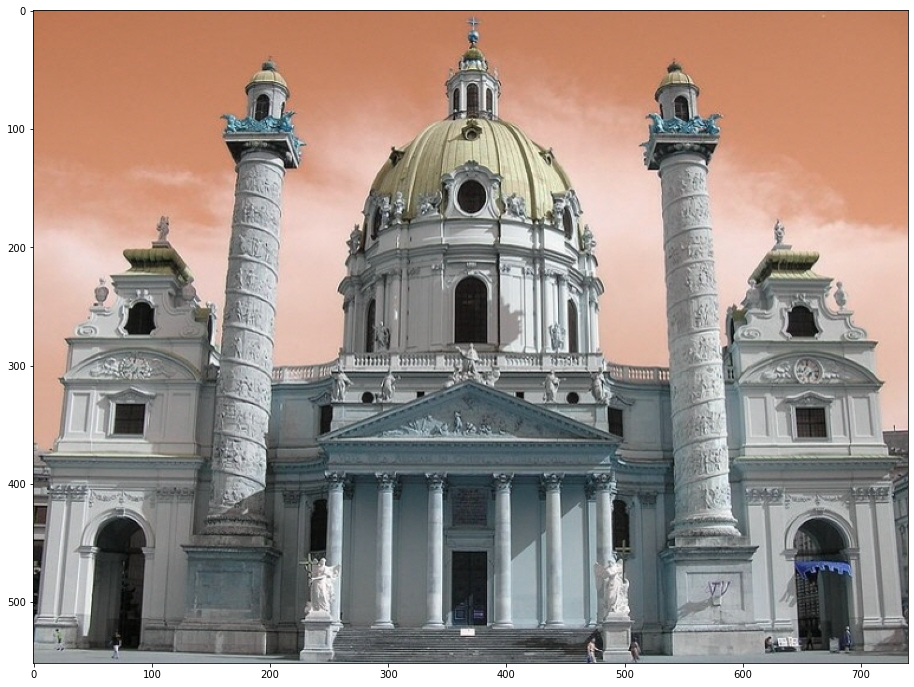

In [1]:
import cv2
import matplotlib.pyplot as plt

hr_img = cv2.imread('/content/drive/MyDrive/EX/EX16/baroque.jpg') # skimage에서 제공하는 예제 이미지를 불러온다.
#hr_img = cv2.resize(hr_img, dsize=(hr_img.shape[1], hr_img.shape[0]+1))
hr_shape = hr_img.shape[:2]

print(hr_shape) # 이미지의 크기를 출력한다.

plt.figure(figsize=(20,12))
plt.imshow(hr_img)

In [2]:
def crop(image, left_top, x=50, y=100):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

In [3]:
def interpolation_xn(image, n):
    downsample = cv2.resize(
        image,
        dsize=(hr_shape[1]//n, hr_shape[0]//n)
    )
    upsample = cv2.resize(
        downsample,
        dsize=(hr_shape[1], hr_shape[0]),
        interpolation=cv2.INTER_CUBIC
    )
    return upsample

bicubic_img = interpolation_xn(hr_img, 4)
bicubic_img.shape[:2]

(552, 740)

In [4]:
import tensorflow as tf
import os

model_file = '/content/drive/MyDrive/EX/EX16/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

(552, 740)

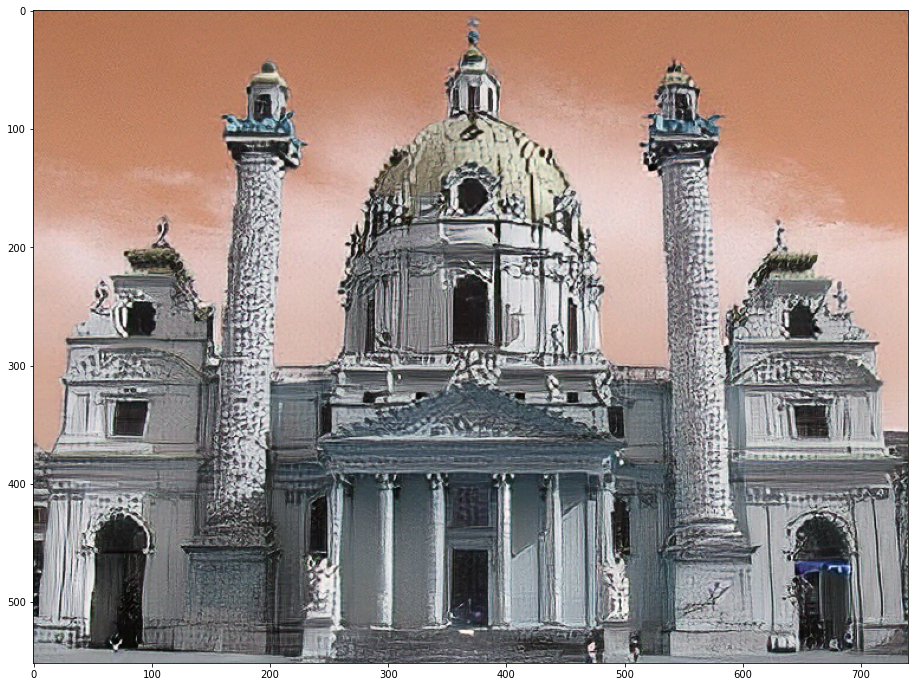

In [5]:
import numpy as np

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

# 원본 이미지를 1/4로 줄인다.
quarter_img = cv2.resize(hr_img, dsize=(hr_shape[1]//4, hr_shape[0]//4))
# 원본 이미지를 SRGAN을 이용하여 원본이미지의 사이즈로 resize한다.
srgan_img = apply_srgan(quarter_img)
plt.figure(figsize=(20,12))
plt.imshow(srgan_img)
srgan_img.shape[:2]

/usr/local/lib/python3.7/dist-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


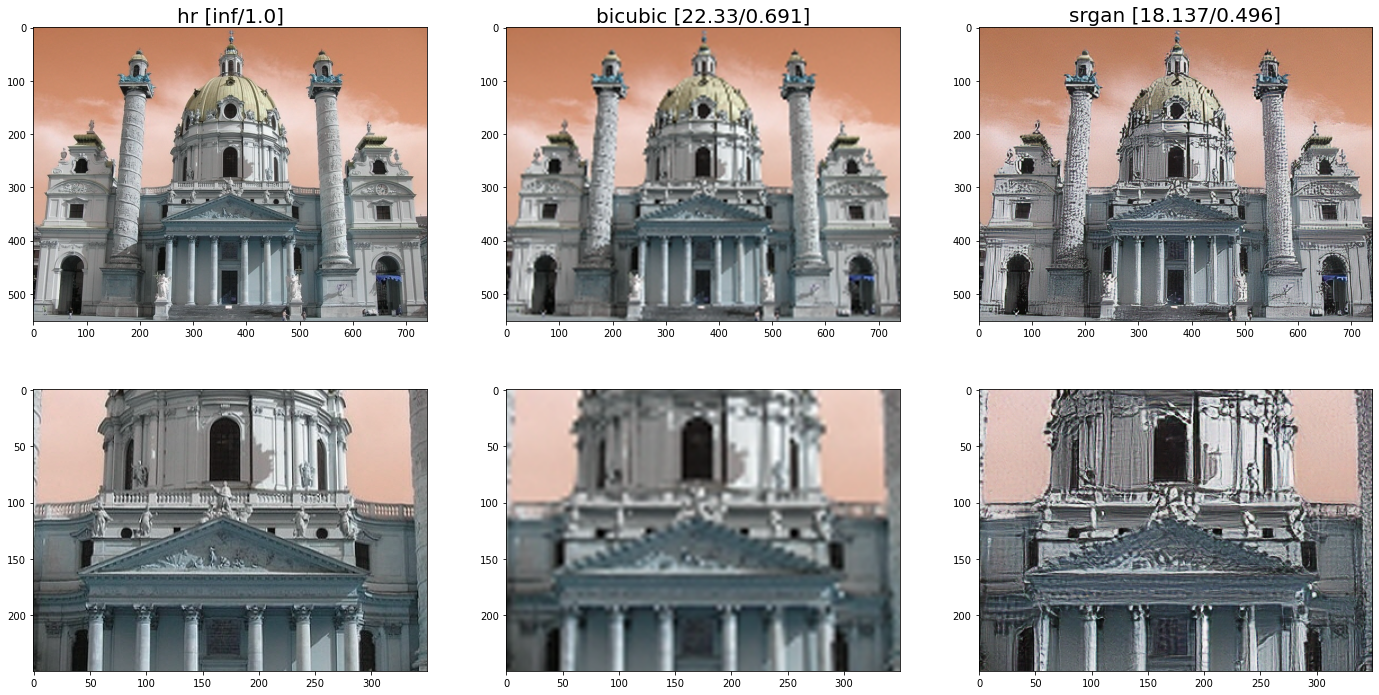

In [6]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

images = [hr_img, bicubic_img, srgan_img]
titles = ["hr", "bicubic", "srgan"]

# 각 이미지에 대해 PSNR을 계산하고 반올림합니다.
psnr = [round(peak_signal_noise_ratio(hr_img, i), 3) for i in images]
# 각 이미지에 대해 SSIM을 계산하고 반올림합니다.
ssim = [round(structural_similarity(hr_img, i, multichannel=True), 3) for i in images]

plt.figure(figsize=(24,12))
for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(titles[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=20)

left_top = (200,200)

for i in range(len(images)):
    plt.subplot(2,3,3+i+1)
    plt.imshow(crop(images[i], left_top, 250, 350))

## 프로젝트 1-2

1. (적당히) 낮은 해상도를 가진 이미지를 검색해서 한 장 고른 후 저장하고 불러옵니다.
2. 불러온 이미지를 입력으로 SRGAN을 이용해 고해상도 이미지를 생성합니다. 이전에 사용한 apply_srgan 함수를 사용하면 쉽습니다.
3. 1.에서 불러온 이미지에 bicubic interpolation을 적용해 가로 및 세로 픽셀 수를 다시 4배로 늘립니다. cv2.resize()를 사용해 봅시다.
4. 2개 이미지(3.의 Bicubic의 결과, 2.의 SRGAN의 결과)를 나란히 시각화합니다. 각 이미지의 제목에 어떤 방법에 대한 결과인지 표시해 주세요. 이전 시각화에 사용했던 코드를 참고하면 어렵지 않습니다.
5. 선택한 이미지를 DIV2K 데이터셋에서 학습된 모델로 Super Resolution했을 때 어떠한 결과가 나왔으며, 왜 이러한 결과가 출력되었는지 설명해 봅시다. (정답은 없습니다)

(720, 539)


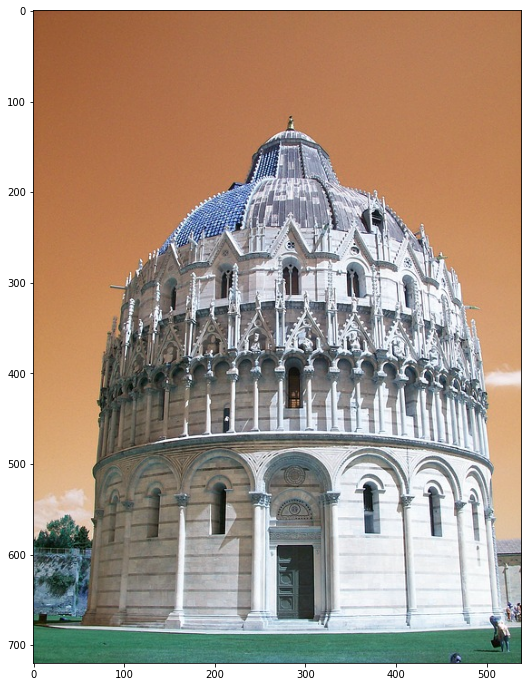

In [7]:
import cv2
import matplotlib.pyplot as plt

lr_img = cv2.imread('/content/drive/MyDrive/EX/EX16/lr_baroque.jpg') # skimage에서 제공하는 예제 이미지를 불러온다.
#hr_img = cv2.resize(hr_img, dsize=(hr_img.shape[1], hr_img.shape[0]+1))
lr_shape = lr_img.shape[:2]

print(lr_shape) # 이미지의 크기를 출력한다.

plt.figure(figsize=(20,12))
plt.imshow(lr_img)

In [8]:
srgan_lr_img = apply_srgan(lr_img)
bicubic_lr_img = cv2.resize(lr_img,dsize=(lr_shape[1]*4, lr_shape[0]*4),interpolation=cv2.INTER_CUBIC)

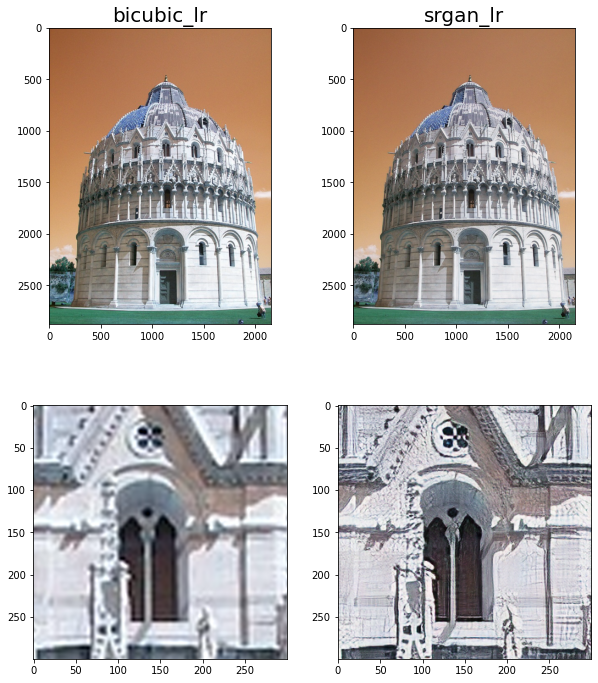

In [9]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

images_lr = [bicubic_lr_img, srgan_lr_img]
titles_lr = ["bicubic_lr", "srgan_lr"]

# 각 이미지에 대해 PSNR을 계산하고 반올림합니다.
#psnr_lr = [round(peak_signal_noise_ratio(lr_img, i), 3) for i in images_lr]
# 각 이미지에 대해 SSIM을 계산하고 반올림합니다.
#ssim_lr = [round(structural_similarity(lr_img, i, multichannel=True), 3) for i in images_lr]

plt.figure(figsize=(10,12))
for i in range(len(images_lr)):
    plt.subplot(2,2,i+1)
    plt.imshow(images_lr[i])
    #plt.title(titles_lr[i] + f" [{psnr[i]}/{ssim[i]}]", fontsize=20)
    plt.title(titles_lr[i], fontsize=20)

left_top_lr = (1000,1000)

for i in range(len(images_lr)):
    plt.subplot(2,2,2+i+1)
    plt.imshow(crop(images_lr[i], left_top_lr, 300, 300))

# 프로젝트 2 : SRGAN을 이용해 고해상도 gif생성하기
---

이미 학습된 SRGAN을 이용해 저해상도 영상을 고해상도 영상으로 바꿔보는 프로젝트를 수행해보자.

In [10]:
import cv2

# 다운받은 파일의 경로를 설정해 주세요.
gif = cv2.VideoCapture("/content/drive/MyDrive/EX/EX16/fire_lr.gif")

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))
print(frames[0].shape[0])

frame 수 : 14
frame 크기 : (282, 300, 3)
282


In [11]:
frame_sr_srgan = []
frame_sr_bicubic = []

for i in range(len(frames)):
    frame_sr_srgan.append(apply_srgan(frames[i]))
    frame_sr_bicubic.append(cv2.resize(frames[i],dsize=(frames[i].shape[1]*4, frames[i].shape[0]*4),interpolation=cv2.INTER_CUBIC))

print("뿅=3")

뿅=3


In [12]:
import imageio

imageio.mimsave("/content/drive/MyDrive/EX/EX16/fire_hr_srgan.gif", frame_sr_srgan)
imageio.mimsave("/content/drive/MyDrive/EX/EX16/frame_sr_bicubic.gif", frame_sr_bicubic)

In [13]:
from IPython.display import Image as show_gif
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

show_gif(open("/content/drive/MyDrive/EX/EX16/fire_hr_srgan.gif",'rb').read(), width=800) # width 는 적당히 큰 값으로 설정해주세요

Output hidden; open in https://colab.research.google.com to view.

In [14]:
show_gif(open("/content/drive/MyDrive/EX/EX16/frame_sr_bicubic.gif",'rb').read(), width=800) # width 는 적당히 큰 값으로 설정해주세요

Output hidden; open in https://colab.research.google.com to view.

In [1]:
show_gif(open("/content/drive/MyDrive/EX/EX16/fire_lr.gif",'rb').read(), width=800) # width 는 적당히 큰 값으로 설정해주세요

NameError: ignored